In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

#Download all necessary data
df2014 = pd.read_csv('./developer_survey_2014/2014 Stack Overflow Survey Responses.csv', low_memory=False)
df2015 = pd.read_csv('./developer_survey_2015/2015 Stack Overflow Developer Survey Responses.csv', header=1, low_memory=False)
df2016 = pd.read_csv('./developer_survey_2016/2016 Stack Overflow Survey Responses.csv', low_memory=False)
df2017 = pd.read_csv('./developer_survey_2017/survey_results_public.csv', low_memory=False)
df2018 = pd.read_csv('./developer_survey_2018/survey_results_public.csv', low_memory=False)
df2019 = pd.read_csv('./developer_survey_2019/survey_results_public.csv', low_memory=False)
df2020 = pd.read_csv('./developer_survey_2020/survey_results_public.csv', low_memory=False)



### Academic degree distribution among the respondents for 2017-2020
The objective is to calculate the yearly percentage of people working in the field who belong to different educational levels.

Bachelor's degree                                                    0.420474
Master's degree                                                      0.216785
Some college/university study without earning a bachelor's degree    0.158176
Secondary school                                                     0.114960
Doctoral degree                                                      0.025451
I prefer not to answer                                               0.021579
Primary/elementary school                                            0.020373
Professional degree                                                  0.013913
I never completed any formal education                               0.008289
Name: 2017, dtype: float64


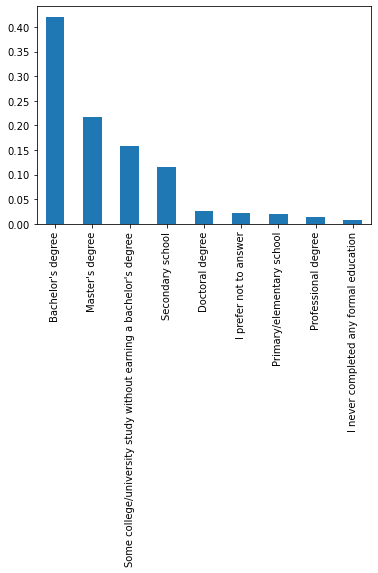

In [149]:
df2017_cleared = df2017['FormalEducation'].dropna()
df2017_cleared = df2017_cleared.value_counts()
df2017_cleared = df2017_cleared/df2017_cleared.sum()
df2017_cleared.name = '2017'
print(df2017_cleared)

df2017_cleared.plot(kind='bar')

In [150]:
#Mapping to insure uniformity of data
degree_mapping = {'Bachelor’s degree (BA, BS, B.Eng., etc.)': "Bachelor's degree",
                 'Master’s degree (MA, MS, M.Eng., MBA, etc.)': "Master's degree",
                 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
                 'Associate degree (A.A., A.S., etc.)': 'Associate degree',
                 'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
                 'Professional degree (JD, MD, etc.)': 'Professional degree', 
                 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's degree",                                       
                 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master's degree",                                          
                 'Associate degree (A.A., A.S., etc.)': 'Associate degree',
                 'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
                 'Some college/university study without earning a degree': "Some college/university study without earning a bachelor's degree"}

Bachelor's degree                                                    0.461010
Master's degree                                                      0.225927
Some college/university study without earning a bachelor's degree    0.123650
Secondary school                                                     0.094517
Associate degree                                                     0.031361
Doctoral degree                                                      0.023378
Primary/elementary school                                            0.017486
Professional degree                                                  0.015279
I never completed any formal education                               0.007392
Name: 2018, dtype: float64


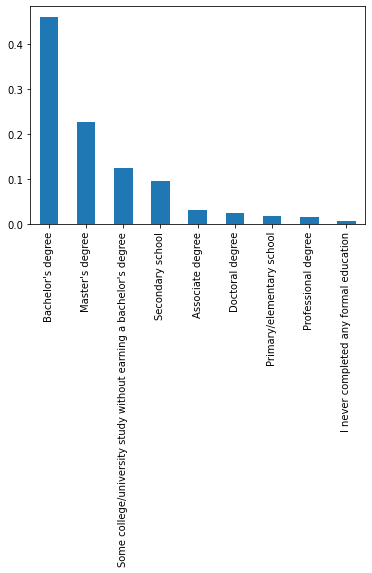

In [151]:
df2018_cleared = df2018['FormalEducation'].dropna()
df2018_cleared = df2018_cleared.value_counts()
df2018_cleared = df2018_cleared/df2018_cleared.sum()
df2018_cleared.rename(degree_mapping, inplace=True)
df2018_cleared.name = '2018'
print(df2018_cleared)

df2018_cleared.plot(kind='bar')

Bachelor's degree                                                    0.452992
Master's degree                                                      0.226519
Some college/university study without earning a bachelor's degree    0.121565
Secondary school                                                     0.100035
Associate degree                                                     0.034009
Doctoral degree                                                      0.028151
Primary/elementary school                                            0.016460
Professional degree                                                  0.013867
I never completed any formal education                               0.006401
Name: 2019, dtype: float64


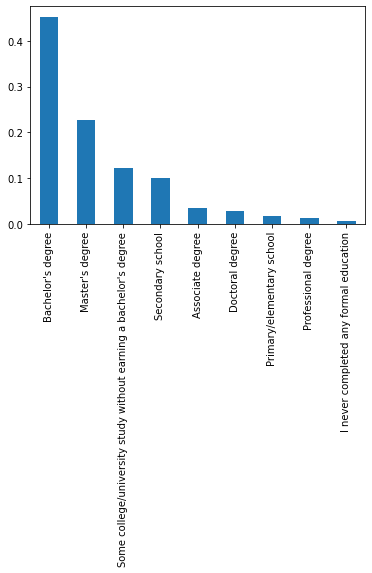

In [152]:
df2019_cleared = df2019['EdLevel'].dropna()
df2019_cleared = df2019_cleared.value_counts()
df2019_cleared = df2019_cleared/df2019_cleared.sum()
df2019_cleared.rename(degree_mapping, inplace=True)
df2019_cleared.name = '2019'
print(df2019_cleared)

df2019_cleared.plot(kind='bar')

Bachelor's degree                                                    0.462155
Master's degree                                                      0.228309
Some college/university study without earning a bachelor's degree    0.126047
Secondary school                                                     0.083074
Associate degree                                                     0.032091
Doctoral degree                                                      0.029427
Primary/elementary school                                            0.016385
Professional degree                                                  0.013930
I never completed any formal education                               0.008584
Name: 2020, dtype: float64


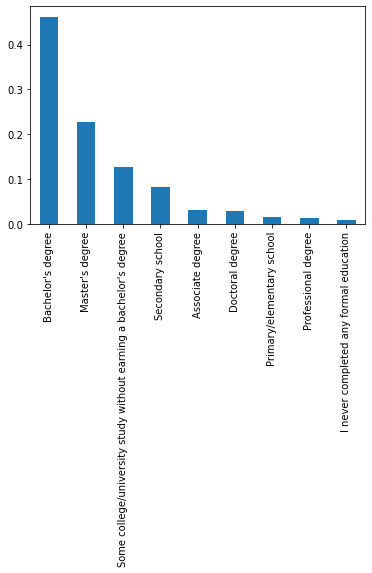

In [153]:
df2020_cleared = df2020['EdLevel'].dropna()
df2020_cleared = df2020_cleared.value_counts()
df2020_cleared = df2020_cleared/df2020_cleared.sum()
df2020_cleared.rename(degree_mapping, inplace=True)
df2020_cleared.name = '2020'
print(df2020_cleared)

df2020_cleared.plot(kind='bar')

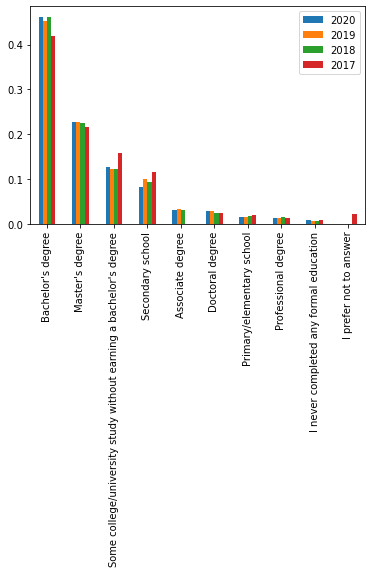

In [154]:
df = pd.concat([df2020_cleared, df2019_cleared, df2018_cleared, df2017_cleared], axis=1)
df.plot(kind='bar')

##### Conclusion:
The distribution is almost identical for last 4 years.

### Salary changes 2014-2020
The objective is to discover how the salaries of people working in IT changed in recent 7 years.

In [155]:
set(df2014['Including bonus, what is your annual compensation in USD?'].values)

{'$100,000 - $120,000',
 '$120,000 - $140,000',
 '$20,000 - $40,000',
 '$40,000 - $60,000',
 '$60,000 - $80,000',
 '$80,000 - $100,000',
 '<$20,000',
 '>$140,000',
 'Rather not say',
 'Response',
 'Student / Unemployed',
 nan}

In [156]:
def salary_convertor2014(sal):
    '''
        Performs convertion from salary ranges to mean values.
        Non-numeric responses are mapped to NaN.
        
        INPUT - a pandas series with salary ranges
    '''
    if sal == '$100,000 - $120,000':
        return 110000
    if sal == '$120,000 - $140,000':
        return 130000
    if sal == '$20,000 - $40,000':
        return 30000
    if sal == '$40,000 - $60,000':
        return 50000
    if sal == '$60,000 - $80,000':
        return 70000
    if sal == '$80,000 - $100,000':
        return 90000
    if sal == '<$20,000':
        return 10000
    if sal == '>$140,000':
        return 150000
    if sal == 'Rather not say':
        return np.nan
    if sal == 'Response':
        return np.nan
    if sal == 'Student / Unemployed':
        return np.nan

sal2014 = df2014['Including bonus, what is your annual compensation in USD?']
sal2014 = sal2014.map(salary_convertor2014, na_action='ignore').mean()
sal2014

60205.49426779148

In [157]:
def salary_convertor2015(sal):
    '''
        Performs convertion from salary ranges to mean values.
        Non-numeric responses are mapped to NaN.
        
        INPUT - a pandas series with salary ranges
    '''
    
    if sal == 'Rather not say':
        return np.nan
    if sal == 'Unemployed':
        return np.nan
    else:
        return int(sal)
    
    
sal2015 = df2015['Compensation: midpoint'].map(salary_convertor2015, na_action='ignore').mean()
sal2015

54652.35242646564

In [158]:
sal2016 = df2016['salary_midpoint'].mean()

In [159]:
sal2017 = df2017['Salary'].mean()

In [160]:
sal2018 = df2018['ConvertedSalary'].mean()

In [161]:
sal2019 = df2019['ConvertedComp'].mean()

In [162]:
sal2020 = df2020['ConvertedComp'].mean()

In [163]:
sal_df = pd.Series([sal2014, sal2015, sal2016, sal2017, sal2018, sal2019, sal2020], index=[2014, 2015, 2016, 2017, 2018, 2019, 2020])
sal_df

2014     60205.494268
2015     54652.352426
2016     53952.973025
2017     56298.480641
2018     95780.861788
2019    127110.738423
2020    103756.050150
dtype: float64

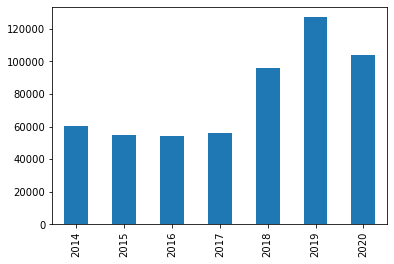

In [164]:
sal_df.plot(kind='bar')

##### Conclusion:
In the first 4 years the salaries were approximately on the same level. Starting from 2018, there is a major raise in salaries with it's peak in 2019.

### Languages popularity 2014-2020
The objective is to discover which programming languages were popular in the last 7 years.

In [165]:
set_of_languages = {'C', 'C++', 'C++11', 'C#', 'Java', 'JavaScript', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL',
                    'CoffeeScript', 'Clojure', 'Dart', 'F#', 'Go', 'Haskell', 'Matlab', 'Perl', 'R', 'Rust', 'Scala', 
                    'Swift', 'Visual Basic', 'Other'}

def filter_languages(ser, set_of_lang):
    '''
    INPUT
        series - a pandas series which may contain languages and other tech
        set_of_lang - a list of programming languages
    OUTPUT
        filtered_ser - a pandas series which contains only languages
    '''
    filtered_ser = ser
    for idx in filtered_ser.index:
        if idx not in set_of_lang:
            filtered_ser.drop(idx, inplace=True)
    return filtered_ser

##### Languages 2014

In [166]:
lang2014 = df2014.loc[:,'Which of the following languages or technologies have you used significantly in the past year?':
                        'Which technologies are you excited about?']
lang2014 = lang2014.drop('Which technologies are you excited about?', axis=1)
lang2014.columns = lang2014.iloc[0]
lang2014 = lang2014.iloc[1:]
lang2014 = lang2014.count()
lang2014.name = 2014
idx = lang2014.index
new_idx = list(idx)
new_idx[-1] = 'Other'
lang2014.index = new_idx
lang2014 = filter_languages(lang2014, set_of_languages) #List of languages included a framework so needed filtering
lang2014


C              1174
C++            1418
C#             2378
Java           2479
JavaScript     3783
Objective-C     675
PHP            1710
Python         1473
Ruby            593
SQL            3467
Other          1398
Name: 2014, dtype: int64

##### Languages 2015

In [167]:
lang2015 = df2015.loc[:,'Current Lang & Tech: Android':'Current Lang & Tech: Write-In']
lang2015 = lang2015.count()
idx = list(lang2015.index) #Editing index to make it uniform with previous data
for i in range(len(idx)):
    colon_pos = idx[i].find(':')
    idx[i] = idx[i][colon_pos+2:]
idx[-1] = 'Other'
lang2015.index = idx
lang2015 = filter_languages(lang2015, set_of_languages) #List of languages included other technologies so needed filtering
lang2015.name = '2015'
lang2015

C                3612
C++              4529
C++11            1851
C#               6949
CoffeeScript      783
Clojure           176
Dart              109
F#                174
Go                462
Haskell           357
Java             8219
JavaScript      11962
Matlab            860
Objective-C      1719
Perl              738
PHP              6529
Python           5238
R                 755
Ruby             1765
Rust              103
Scala             538
SQL              9439
Swift             759
Visual Basic     1701
Other            2148
Name: 2015, dtype: int64

##### Languages 2016

In [168]:
def separate_items(series, delimiter, dtype='object'):
    '''
    INPUT
        series - a pandas series with values to separate
        delimiter - a token that separates values
        dtype - a dtype of values 
    OUTPUT
        separated_ser - a pandas series with separated values
    '''

    separated_ser = pd.Series(np.nan, index=range(len(series)), dtype=dtype)
    for i in range(len(separated_ser)):
        if series[i] is not np.nan:
            separated_ser[i] = series[i].split(delimiter)
        else:
            separated_ser[i] = series[i]
    separated_ser.dropna(inplace=True)
    return separated_ser

            
temp2016 = df2016['tech_do'] 
lang2016 = separate_items(temp2016, "; ")
lang2016

1                                       [iOS, Objective-C]
6        [Android, Arduino / Raspberry Pi, AngularJS, C...
7                        [JavaScript, PHP, SQL, WordPress]
9                                                    [PHP]
10       [Arduino / Raspberry Pi, C, C++, Java, JavaScr...
                               ...                        
56020                            [C++, JavaScript, Python]
56022    [Arduino / Raspberry Pi, AngularJS, CoffeeScri...
56024                     [Android, C, C++, C#, Java, SQL]
56026     [Arduino / Raspberry Pi, C, Java, Python, Swift]
56029    [Arduino / Raspberry Pi, AngularJS, JavaScript...
Length: 49025, dtype: object

In [169]:
def count_values(series):
    '''
    INPUT
        series - a pandas series with lists of objects
    OUTPUT
        possible_values - a set of all unique values in the given series
    '''
    possible_values = set()
    for item in series.values:
        possible_values = possible_values.union(set(item))

    series_count = pd.Series(0, index=possible_values, dtype='int')
    for item in series.values:
        for lang in item:
            series_count[lang] = series_count[lang] + 1
    return series_count

lang2016_count = count_values(lang2016)
lang2016_count

LAMP                              4821
SQL Server                        9306
SharePoint                         853
Windows Phone                     1123
C#                               15283
CoffeeScript                      1662
Objective-C                       3202
Haskell                            813
Cassandra                          663
C                                 7678
Spark                              707
Salesforce                         665
Redis                             2862
Android                           8601
Python                           12282
Arduino / Raspberry Pi            3797
WordPress                         4496
Java                             17942
Scala                             1602
SQL                              21976
Hadoop                            1012
R                                 1632
Ruby                              4383
Matlab                            1602
Dart                               222
Go                       

In [170]:
#Some extra work to make data uniform

lang2016 = lang2016_count
lang2016 = filter_languages(lang2016, set_of_languages) #List of languages included other technologies so needed filtering
lang2016.name = '2016'
lang2016

C#              15283
CoffeeScript     1662
Objective-C      3202
Haskell           813
C                7678
Python          12282
Java            17942
Scala            1602
SQL             21976
R                1632
Ruby             4383
Matlab           1602
Dart              222
Go               1547
JavaScript      27385
F#                484
Rust              436
Visual Basic     3312
Clojure           556
PHP             12780
C++              9589
Swift            2746
Perl             1624
Name: 2016, dtype: int32

##### 2017 languages

In [171]:
def assemble_list_of_technologies(df, fields, delim):
    '''
    INPUT
        df - a dataframe from which to extract values
        fields - a list of column names in df that denote languages, frameworks, databases, platforms and other
        technologies worked with in the given year
        delim - delimeter that separates values in each column
    OUTPUT
        result - a pandas series with languages, frameworks, databases and platforms as index and the count of users as values
    '''

    result = pd.Series(dtype='int')
    
    for field in fields:
        tech = df[field]
        tech = separate_items(tech, delim)
        tech = count_values(tech)
        result = result.append(tech)
        
    return result
    
   


In [172]:
lang2017 = assemble_list_of_technologies(df2017, ['HaveWorkedLanguage'], "; ")

In [173]:
#Some extra work to make this data uniform with the previous years
lang2017.rename({"Visual Basic 6": "Visual Basic"}, inplace=True)
lang2017.name = 2017
lang2017

C#              12476
CoffeeScript     1192
Visual Basic     1071
Julia             138
Haskell           649
Objective-C      2349
VB.NET           2273
C                6974
Lua              1039
Python          11704
Elixir            380
TypeScript       3488
Groovy           1193
Java            14524
Erlang            281
Scala            1309
SQL             18754
VBA              1574
Ruby             3324
R                1634
Assembly         1823
Matlab           1569
Dart              145
Go               1557
JavaScript      22875
F#                457
Rust              416
Clojure           391
PHP             10290
C++              8155
Smalltalk         327
Swift            2368
Common Lisp       273
Hack              107
Perl             1585
Name: 2017, dtype: int32

##### Languages 2018

In [174]:
lang2018 = assemble_list_of_technologies(df2018, ['LanguageWorkedWith'], ";")

In [175]:
lang2018

CSS                     50979
C#                      26954
CoffeeScript             2603
Ocaml                     470
Julia                     430
Visual Basic 6           3087
Objective-C              5510
VB.NET                   5254
Haskell                  1961
C                       18042
Lua                      2733
Delphi/Object Pascal     2025
Python                  30359
Kotlin                   3508
TypeScript              13626
Bash/Shell              31172
Groovy                   3373
Java                    35521
Erlang                    886
Scala                    3420
SQL                     44670
VBA                      3810
R                        4813
Ruby                     7911
Assembly                 5760
Matlab                   4564
Go                       5532
JavaScript              54686
F#                       1115
Rust                     1857
Clojure                  1032
PHP                     24071
C++                     19872
Cobol     

In [176]:
#Some extra work to make this data uniform with the previous years
lang2018['HTML'] = lang2018['HTML'] + lang2018['CSS']
lang2018.drop('CSS', inplace=True)
lang2018.rename({"Visual Basic 6": "Visual Basic"}, inplace=True)
lang2018.rename({"HTML": "HTML/CSS"}, inplace=True)
lang2018.name = 2018
lang2018

C#                       26954
CoffeeScript              2603
Ocaml                      470
Julia                      430
Visual Basic              3087
Objective-C               5510
VB.NET                    5254
Haskell                   1961
C                        18042
Lua                       2733
Delphi/Object Pascal      2025
Python                   30359
Kotlin                    3508
TypeScript               13626
Bash/Shell               31172
Groovy                    3373
Java                     35521
Erlang                     886
Scala                     3420
SQL                      44670
VBA                       3810
R                         4813
Ruby                      7911
Assembly                  5760
Matlab                    4564
Go                        5532
JavaScript               54686
F#                        1115
Rust                      1857
Clojure                   1032
PHP                      24071
C++                      19872
Cobol   

##### Languages 2019

In [177]:
lang2019 = assemble_list_of_technologies(df2019, ['LanguageWorkedWith'], ";")

In [178]:
lang2019

Java                     35917
VBA                       4781
Erlang                     777
SQL                      47544
Bash/Shell/PowerShell    31991
Scala                     3309
R                         5048
Ruby                      7331
Assembly                  5833
Dart                      1683
Go                        7201
JavaScript               59219
C#                       27097
F#                         973
Rust                      2794
WebAssembly               1015
Objective-C               4191
Clojure                   1254
C                        18017
PHP                      23030
C++                      20524
Swift                     5744
Other(s):                 7920
Python                   36443
HTML/CSS                 55466
Kotlin                    5620
Elixir                    1260
TypeScript               18523
dtype: int32

In [179]:
#Some extra work to make this data uniform with the previous years
lang2019.rename({"Other(s):": "Other"}, inplace=True)
lang2019.rename({"Bash/Shell/PowerShell": "Bash/Shell"}, inplace=True)
lang2019.name = 2019
lang2019

Java           35917
VBA             4781
Erlang           777
SQL            47544
Bash/Shell     31991
Scala           3309
R               5048
Ruby            7331
Assembly        5833
Dart            1683
Go              7201
JavaScript     59219
C#             27097
F#               973
Rust            2794
WebAssembly     1015
Objective-C     4191
Clojure         1254
C              18017
PHP            23030
C++            20524
Swift           5744
Other           7920
Python         36443
HTML/CSS       55466
Kotlin          5620
Elixir          1260
TypeScript     18523
Name: 2019, dtype: int32

##### Languages 2020

In [180]:
lang2020 = assemble_list_of_technologies(df2020, ['LanguageWorkedWith'], ";")

In [181]:
lang2020.rename({"Bash/Shell/PowerShell": "Bash/Shell"}, inplace=True)
lang2020.name = 2020
lang2020

Java           23074
VBA             3499
Scala           2052
SQL            31413
Bash/Shell     18980
Ruby            4046
R               3288
Assembly        3553
Dart            2280
Go              5038
JavaScript     38822
C#             18041
Julia            519
Rust            2929
Objective-C     2340
Haskell         1222
C              12487
PHP            15007
C++            13707
Swift           3397
Python         25287
HTML/CSS       36181
Kotlin          4468
TypeScript     14578
Perl            1796
Name: 2020, dtype: int32

##### Putting all together

In [182]:
lang_over_years = pd.concat([lang2014, lang2015, lang2016, lang2017, lang2018, lang2019, lang2020], axis=1)
lang_over_years.fillna(0, inplace=True)

In [183]:
lang_over_years.columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
lang_over_years

,2014,2015,2016,2017,2018,2019,2020
C,1174.0,3612.0,7678.0,6974.0,18042.0,18017.0,12487.0
C++,1418.0,4529.0,9589.0,8155.0,19872.0,20524.0,13707.0
C#,2378.0,6949.0,15283.0,12476.0,26954.0,27097.0,18041.0
Java,2479.0,8219.0,17942.0,14524.0,35521.0,35917.0,23074.0
JavaScript,3783.0,11962.0,27385.0,22875.0,54686.0,59219.0,38822.0
Objective-C,675.0,1719.0,3202.0,2349.0,5510.0,4191.0,2340.0
PHP,1710.0,6529.0,12780.0,10290.0,24071.0,23030.0,15007.0
Python,1473.0,5238.0,12282.0,11704.0,30359.0,36443.0,25287.0
Ruby,593.0,1765.0,4383.0,3324.0,7911.0,7331.0,4046.0
SQL,3467.0,9439.0,21976.0,18754.0,44670.0,47544.0,31413.0


In [184]:
lang_over_years.sort_values(by='2018', ascending=False, inplace=True) #sorting values for better presentation
#Divide the list into two parts for more convinient presentation
lang_over_years1 = lang_over_years.head(23)
lang_over_years2 = lang_over_years.tail(22)

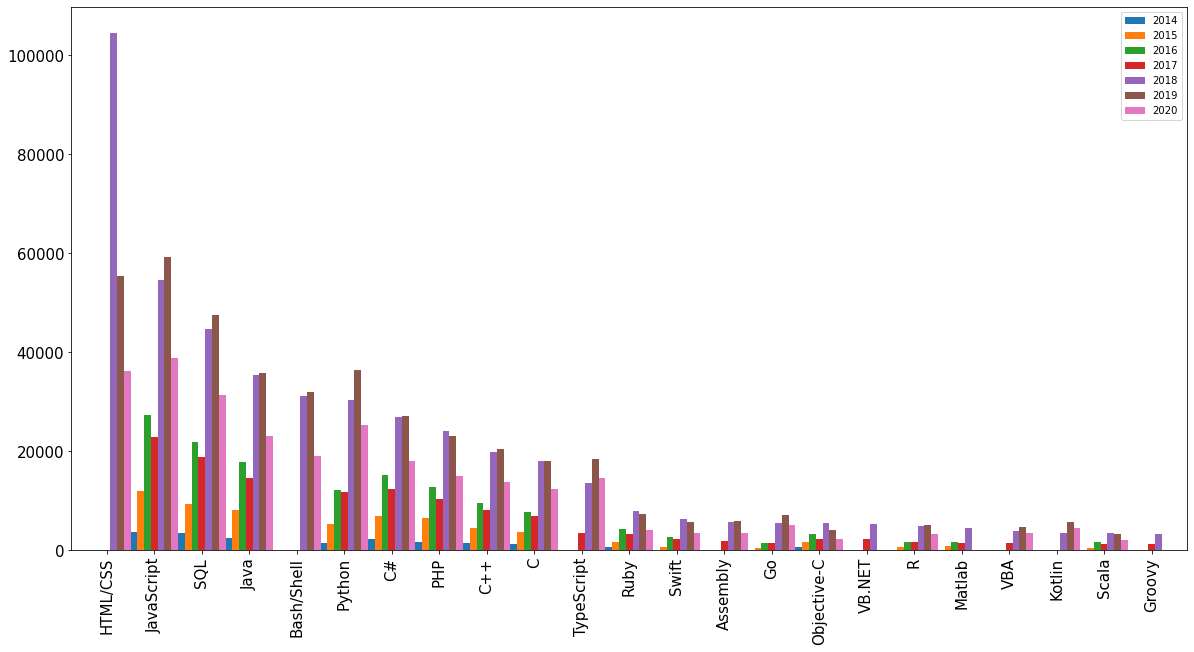

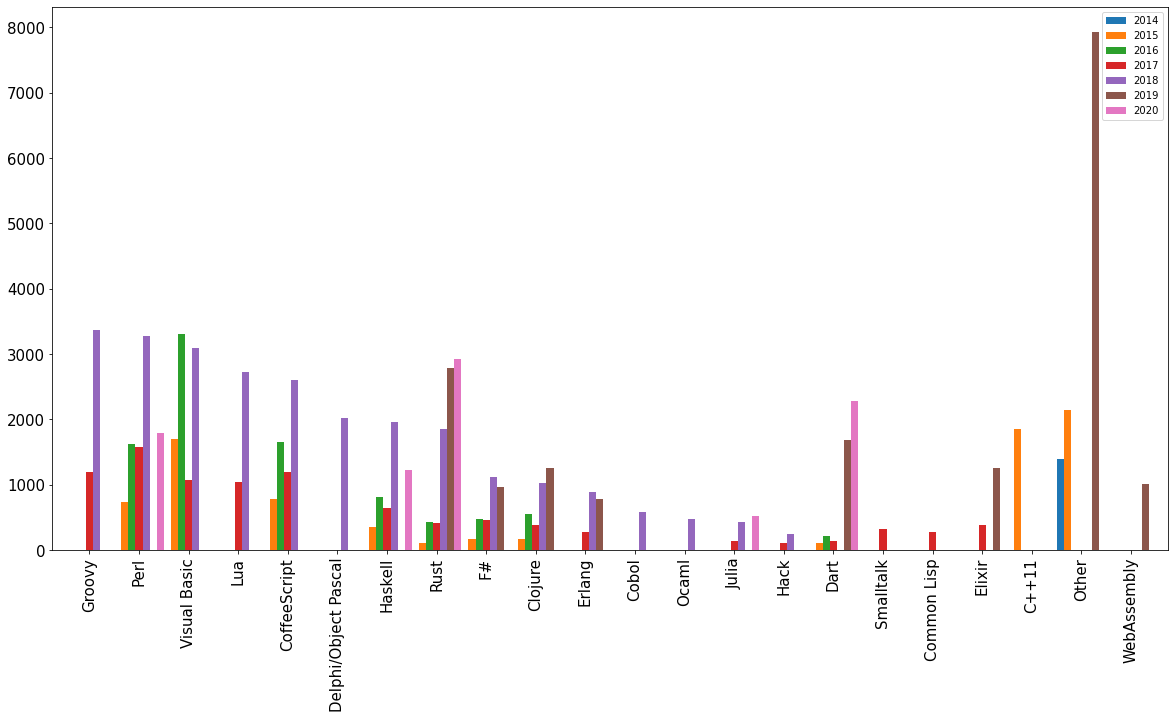

In [185]:
lang_over_years1.plot(kind='bar', figsize=(20,10), width=1, fontsize=15)
lang_over_years2.plot(kind='bar', figsize=(20,10), width=1, fontsize=15)

##### Conclusion:
JavaScript is holding the leading position in all years (we don't count HTML/CSS as a programming lanuage). SQL is very popular, but it's not a general purpose language. The second place is shared (approximately) by Python and Java. C/C++/C# and PHP are also quite popular, but in the last 3 years it's decreasing. It's worth to mention that Bash/Shell scripting is also a frequently used skill.